In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cross_decomposition import PLSRegression # This line imports the necessary class

In [ ]:
# prompt: グーグルドライブと連結
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: グーグルドライブと連結
from google.colab import drive
# CSVファイルの読み込み
data = pd.read_csv("/content/drive/MyDrive/A_comp/clustering_num.csv")


次元削減

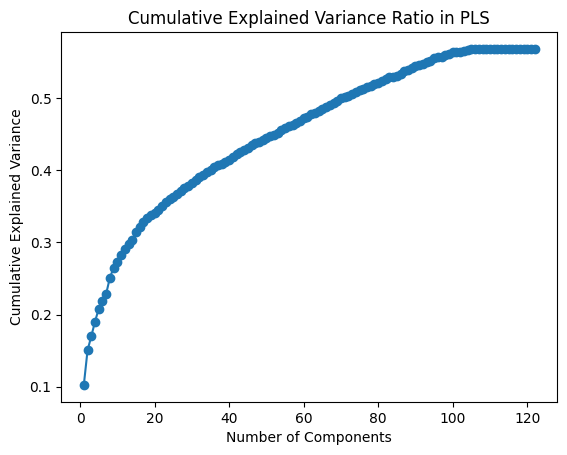

In [ ]:

# 説明変数と目的変数に分割
X = data.drop(columns=["churn"])
y = data["churn"]

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 最大次元数でPLSを適用
pls = PLSRegression(n_components=min(X_train_scaled.shape[1], 130))  # 次元が多い場合、上限100に設定
pls.fit(X_train_scaled, y_train)

# 各成分の寄与率の計算
explained_variance_ratio = np.var(pls.x_scores_, axis=0) / np.var(X_train_scaled, axis=0).sum()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 累積寄与率のスクリープロットを表示
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio in PLS')
plt.show()
# エルボーポイントを参考にした次元数（例として20を使用）
n_components = 20  # エルボーポイントで確認した次元数を設定

# PLSで次元削減を実行
pls = PLSRegression(n_components=n_components)
X_train_reduced = pls.fit_transform(X_train_scaled, y_train)[0]  # [0]で変換後のXを取得
X_test_reduced = pls.transform(X_test_scaled)

In [ ]:
X_train_reduced.shape

(78612, 20)

In [ ]:
y_train.shape

(78612,)

In [ ]:
X_test_reduced.shape

(19654, 20)

In [ ]:
y_test.shape

(19654,)

## モデル事項

In [ ]:
# 서포트 벡터 머신 모델 생성
model = svm.SVC(gamma='scale')

# 교차 검증을 통한 점수 계산
cv_scores = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='accuracy')  # 5分割交差検証

# 교차 검증 결과 출력
print(f"Cross-validation scores (5-fold): {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

# 모델을 훈련 데이터 전체로 학습
model.fit(X_train_reduced, y_train)

# 테스트 데이터를 사용하여 예측
y_pred = model.predict(X_test_reduced)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Cross-validation scores (5-fold): [0.6044012  0.60242956 0.60354917 0.606475   0.60609337]
Average cross-validation score: 0.6046
Accuracy on Test Set: 0.5952477867100845
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59      9920
         1.0       0.59      0.62      0.60      9734

    accuracy                           0.60     19654
   macro avg       0.60      0.60      0.60     19654
weighted avg       0.60      0.60      0.60     19654



In [ ]:
# 설명 변수와 목표 변수로 분할
X = data.drop(columns=["churn"])
y = data["churn"]

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 최대 차원수로 PLS 적용
pls = PLSRegression(n_components=min(X_train_scaled.shape[1], 130))  # 차원이 많을 경우 상한선 100으로 설정
pls.fit(X_train_scaled, y_train)

# 각 성분의 기여도 비율 계산
explained_variance_ratio = np.var(pls.x_scores_, axis=0) / np.var(X_train_scaled, axis=0).sum()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 기여도 비율의 스크리 플롯 표시
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PLS에서 누적 설명 분산 비율')
plt.show()

# 엘보우 포인트를 참고한 차원수 (예시로 20 사용)G
n_components = 20  # 엘보우 포인트에서 확인한 차원수를 설정

# PLS로 차원 축소 실행
pls = PLSRegression(n_components=n_components)
X_train_reduced = pls.fit_transform(X_train_scaled, y_train)[0]  # [0]으로 변환된 X를 추출
X_test_reduced = pls.transform(X_test_scaled)
